# 1 EDA Operations

In [1]:
import pandas as pd
import numpy as np
import pickle
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display 

In [2]:
df_operations = pd.read_pickle("data/staySpain_transformed.pkl")

In [3]:
df_transf = df_operations.copy()

In [4]:
df_transf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7693 entries, 0 to 7999
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   apartment_id                 7693 non-null   int64         
 1   name                         7693 non-null   object        
 2   description                  7693 non-null   object        
 3   host_id                      7693 non-null   int64         
 4   neighbourhood_name           7693 non-null   object        
 5   neighbourhood_district       4669 non-null   object        
 6   room_type                    7693 non-null   object        
 7   accommodates                 7693 non-null   int64         
 8   bathrooms                    7650 non-null   Int64         
 9   bedrooms                     7655 non-null   Int64         
 10  beds                         7685 non-null   Int64         
 11  amenities_list               7677 non-null   obj

In [5]:
df_transf.describe()

,apartment_id,host_id,accommodates,bathrooms,bedrooms,beds,price,pricexperson,minimum_nights,maximum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,general_satisf,reviews_per_month,insert_date,amenities_score
count,7.693000e+03,7.693000e+03,7693.000000,7650.0,7655.0,7685.0,7693.000000,7693.000000,7693.000000,7693.000000,...,6043.000000,6049.000000,6038.000000,6047.000000,6037.000000,6037.000000,6052.000000,6132.000000,7693,7693.000000
mean,1.697283e+07,7.097831e+07,4.320811,1.597124,1.951927,2.969421,1020.475165,252.396924,4.582608,759.843104,...,94.545755,93.107952,96.266976,96.350256,95.289051,91.389763,95.083278,124.974234,2019-05-12 12:56:14.912257792,45.380606
min,1.196400e+04,1.070400e+04,1.000000,0.0,0.0,0.0,60.000000,9.090909,1.000000,1.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,1.000000,2017-01-04 00:00:00,0.000000
25%,1.075765e+07,1.203042e+07,2.000000,1.0,1.0,1.0,460.000000,150.000000,1.000000,60.000000,...,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,92.000000,17.000000,2018-09-11 00:00:00,32.000000
50%,1.808626e+07,4.874612e+07,4.000000,1.0,2.0,2.0,750.000000,205.000000,2.000000,1125.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,90.000000,98.000000,58.000000,2019-05-14 00:00:00,45.000000
75%,2.363590e+07,1.186833e+08,6.000000,2.0,3.0,4.0,1250.000000,300.000000,4.000000,1125.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,179.000000,2020-02-29 00:00:00,58.000000
max,3.242329e+07,3.365242e+08,29.000000,12.0,16.0,30.0,6071.000000,5000.000000,365.000000,1125.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1273.000000,2021-02-27 00:00:00,99.000000
std,8.745042e+06,6.569531e+07,2.597507,0.984275,1.293504,2.296587,852.660013,200.861979,11.956949,498.585072,...,9.298714,10.036067,8.087414,7.987649,7.547295,9.689000,6.665356,154.577833,NaN,17.340078


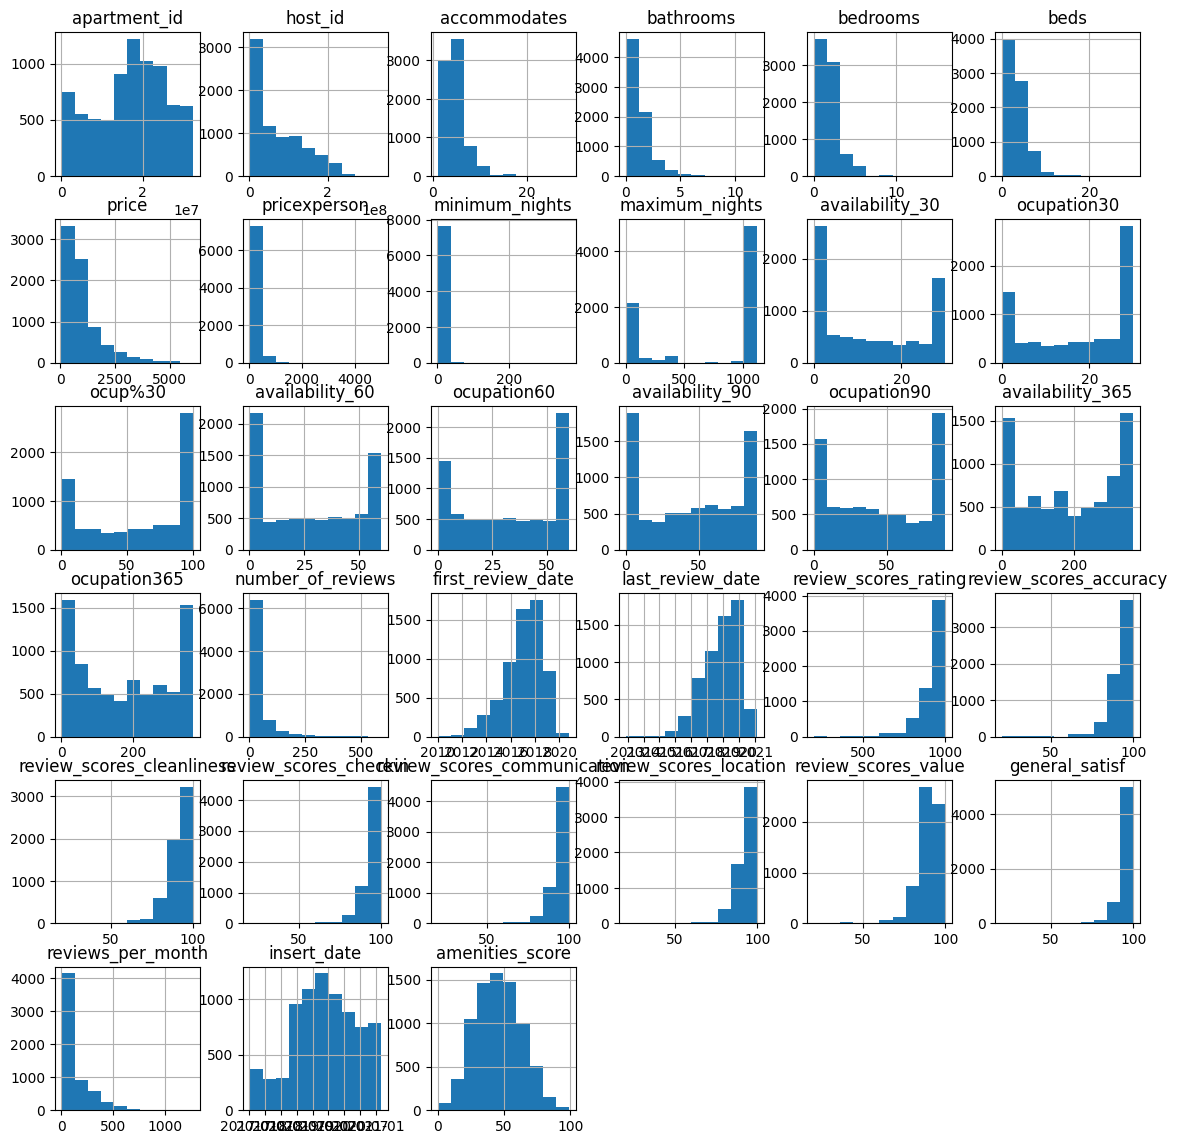

In [6]:
df_transf.hist(figsize=(14,14))
plt.show()

Quin impacte té l'opció de reservar automàticament 
(sense revisió del propietari) a la disponibilitat mitjana a cada ciutat? 

In [7]:
# columnas relevantes
cols = ['city', 'is_instant_bookable',
        'ocupation30', 'ocupation365']
df_ocup = df_operations[cols].copy()

# asegurar numéricos
oc_cols = ['ocupation30', 'ocupation365']
df_ocup[oc_cols] = df_ocup[oc_cols].apply(pd.to_numeric, errors='coerce')

# Tabla 1: con reserva automática (is_instant_bookable = True)
instant_bookable = (
    df_ocup[df_ocup['is_instant_bookable'] == True]
    .groupby('city', as_index=False)[oc_cols].mean(numeric_only=True)
)

# Tabla 2: sin reserva automática (is_instant_bookable = False)
no_instant_bookable = (
    df_ocup[df_ocup['is_instant_bookable'] == False]
    .groupby('city', as_index=False)[oc_cols].mean(numeric_only=True)
)

# Mostrar ambas tablas
print("== Media de ocupación por ciudad (CON reserva automática) ==")
display(instant_bookable)

print("== Media de ocupación por ciudad (SIN reserva automática) ==")
display(no_instant_bookable)

== Media de ocupación por ciudad (CON reserva automática) ==


,city,ocupation30,ocupation365
0,barcelona,18.959280,172.969697
1,girona,16.912799,197.812940
2,madrid,19.081699,192.357298
3,malaga,17.509158,160.106227
4,mallorca,16.544974,157.003968
5,menorca,16.674157,187.775281
6,sevilla,15.357664,162.525547
7,valencia,17.769231,189.730769


== Media de ocupación por ciudad (SIN reserva automática) ==


,city,ocupation30,ocupation365
0,barcelona,18.643983,188.469710
1,girona,13.427105,133.716632
2,madrid,19.396149,206.979367
3,malaga,17.603306,167.272727
4,mallorca,16.850688,150.620825
5,menorca,14.423077,151.435897
6,sevilla,16.782946,176.806202
7,valencia,16.460674,180.943820


## prueba t

In [8]:
from scipy.stats import ttest_ind

# Crear DataFrames separados por grupo
df_true = df_ocup[df_ocup['is_instant_bookable'] == True]
df_false = df_ocup[df_ocup['is_instant_bookable'] == False]

# Columnas de ocupación
ocup_cols = ['ocupation30', 'ocupation365']

results = []

# Recorrer ciudades únicas
for city in sorted(df_operations['city'].unique()):
    row = {'city': city}
    for col in ocup_cols:
        # Extraer valores de cada grupo
        x = df_true[df_true['city'] == city][col].dropna()
        y = df_false[df_false['city'] == city][col].dropna()
        
        # Solo aplicar test si hay datos suficientes
        if len(x) > 1 and len(y) > 1:
            stat, p = ttest_ind(x, y, equal_var=False)
            diff = x.mean() - y.mean()
        else:
            stat, p, diff = None, None, None
        
        row[f'diff_{col}'] = diff
        row[f'p_{col}'] = p
    
    results.append(row)

# Convertir resultados en DataFrame
df_results = pd.DataFrame(results)

# Mostrar resultado
from IPython.display import display
display(df_results)


,city,diff_ocupation30,p_ocupation30,diff_ocupation365,p_ocupation365
0,barcelona,0.315297,0.499446,-15.500013,6.047551e-03
1,girona,3.485694,0.000002,64.096307,1.167305e-17
2,madrid,-0.314449,0.568171,-14.622069,3.230924e-02
3,malaga,-0.094148,0.937662,-7.166500,6.041891e-01
4,mallorca,-0.305714,0.651667,6.383143,3.349163e-01
5,menorca,2.251080,0.277937,36.339383,5.522473e-02
6,sevilla,-1.425282,0.236727,-14.280654,2.860588e-01
7,valencia,1.308557,0.291324,8.786949,5.127355e-01


In [9]:
# Partimos de df_results (con columnas: city, diff_ocupation30, p_ocupation30, diff_ocupation365, p_ocupation365)

# Tabla 30 días
df_30 = (
    df_results[['city','diff_ocupation30','p_ocupation30']].copy()
    .rename(columns={'diff_ocupation30':'diferencia', 'p_ocupation30':'p_value'})
)
df_30['periodo'] = 'ocupation30'
df_30['significativo'] = df_30['p_value'] < 0.05

# Tabla 365 días
df_365 = (
    df_results[['city','diff_ocupation365','p_ocupation365']].copy()
    .rename(columns={'diff_ocupation365':'diferencia', 'p_ocupation365':'p_value'})
)
df_365['periodo'] = 'ocupation365'
df_365['significativo'] = df_365['p_value'] < 0.05

from IPython.display import display
print("== Resultados para ocupación en 30 días ==")
display(df_30)
print("== Resultados para ocupación en 365 días ==")
display(df_365)



== Resultados para ocupación en 30 días ==


,city,diferencia,p_value,periodo,significativo
0,barcelona,0.315297,0.499446,ocupation30,False
1,girona,3.485694,0.000002,ocupation30,True
2,madrid,-0.314449,0.568171,ocupation30,False
3,malaga,-0.094148,0.937662,ocupation30,False
4,mallorca,-0.305714,0.651667,ocupation30,False
5,menorca,2.251080,0.277937,ocupation30,False
6,sevilla,-1.425282,0.236727,ocupation30,False
7,valencia,1.308557,0.291324,ocupation30,False


== Resultados para ocupación en 365 días ==


,city,diferencia,p_value,periodo,significativo
0,barcelona,-15.500013,6.047551e-03,ocupation365,True
1,girona,64.096307,1.167305e-17,ocupation365,True
2,madrid,-14.622069,3.230924e-02,ocupation365,True
3,malaga,-7.166500,6.041891e-01,ocupation365,False
4,mallorca,6.383143,3.349163e-01,ocupation365,False
5,menorca,36.339383,5.522473e-02,ocupation365,False
6,sevilla,-14.280654,2.860588e-01,ocupation365,False
7,valencia,8.786949,5.127355e-01,ocupation365,False


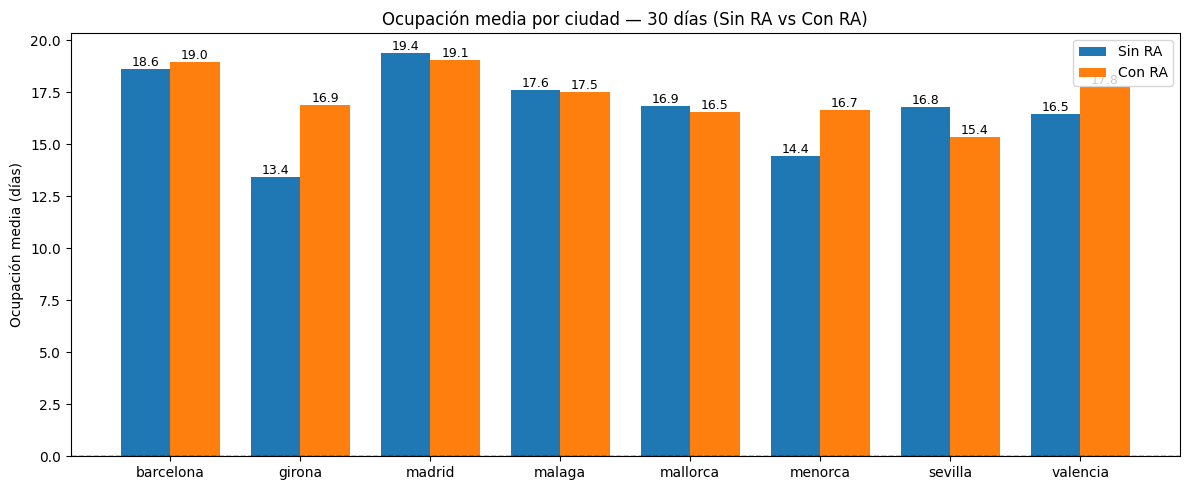

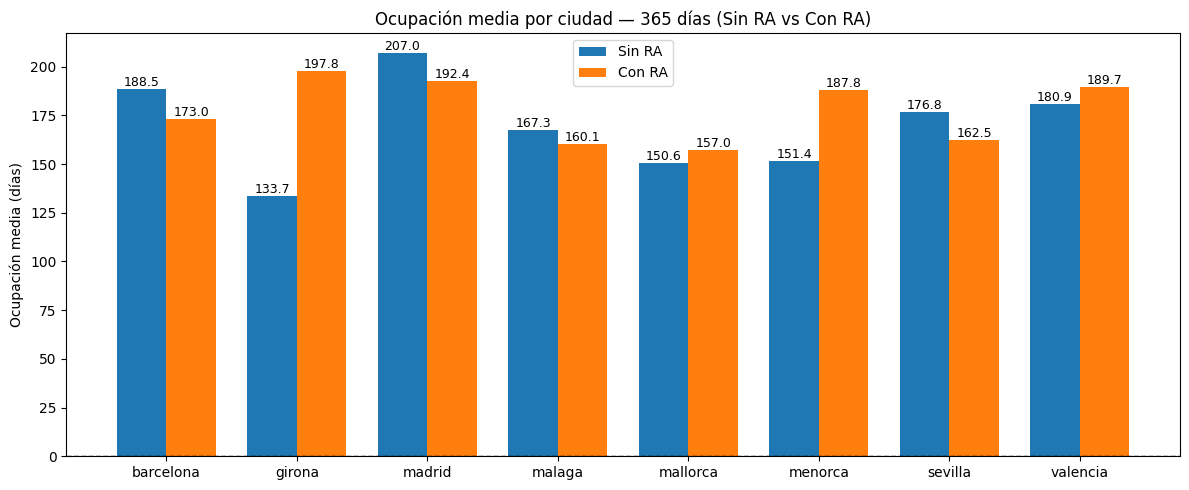

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Unimos las dos tablas por ciudad para tener columnas "sinRA" y "conRA"
merged = (no_instant_bookable
          .merge(instant_bookable, on='city', how='outer', suffixes=('_sinRA', '_conRA'))
          .sort_values('city')
          .reset_index(drop=True))

# Función para dibujar barras comparativas por periodo
def plot_side_by_side(df, col_base, titulo):
    sin_col = f"{col_base}_sinRA"
    con_col = f"{col_base}_conRA"

    cities = df['city'].tolist()
    sin_vals = df[sin_col].values
    con_vals = df[con_col].values

    x = np.arange(len(cities))
    width = 0.38

    fig, ax = plt.subplots(figsize=(12, 5))
    ax.bar(x - width/2, sin_vals, width, label='Sin RA')
    ax.bar(x + width/2, con_vals, width, label='Con RA')

    ax.set_xticks(x)
    ax.set_xticklabels(cities, rotation=0)
    ax.set_ylabel('Ocupación media (días)')
    ax.set_title(titulo)
    ax.axhline(0, color='black', linestyle='--', linewidth=1)
    ax.legend()

    # Etiquetas numéricas sobre cada barra (opcional)
    for i, v in enumerate(sin_vals):
        if np.isfinite(v):
            ax.text(i - width/2, v, f"{v:.1f}", ha='center', va='bottom', fontsize=9)
    for i, v in enumerate(con_vals):
        if np.isfinite(v):
            ax.text(i + width/2, v, f"{v:.1f}", ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()

# Gráfico 1: Ocupación 30 días
plot_side_by_side(merged, 'ocupation30', 'Ocupación media por ciudad — 30 días (Sin RA vs Con RA)')

# Gráfico 2: Ocupación 365 días
plot_side_by_side(merged, 'ocupation365', 'Ocupación media por ciudad — 365 días (Sin RA vs Con RA)')
